<a href="https://colab.research.google.com/github/tricucdu/bai-tap-ai/blob/bai-tap-ann/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(50000, 32 * 32 * 3).astype('float32') / 255
x_test = x_test.reshape(10000, 32 * 32 * 3).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))  # Hidden layer
model.add(Dense(256, activation='relu'))  # Hidden layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=880, batch_size=1000, validation_data=(x_test, y_test))


# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the trained CIFAR-10 model
model.save("cifar10_ann_model.h5")



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.1020 - loss: 2.3100 - val_accuracy: 0.1299 - val_loss: 2.2716
Epoch 2/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.1534 - loss: 2.2526 - val_accuracy: 0.1781 - val_loss: 2.1936
Epoch 3/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.1903 - loss: 2.1690 - val_accuracy: 0.2218 - val_loss: 2.1043
Epoch 4/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.2357 - loss: 2.0711 - val_accuracy: 0.2536 - val_loss: 2.0260
Epoch 5/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.2722 - loss: 1.9603 - val_accuracy: 0.2885 - val_loss: 1.9052
Epoch 6/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.3002 - loss: 1.8777 - val_accuracy: 0.3188 - val_loss: 1.8267
Epoch 7/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.3322 - loss: 1.8046 - val_accuracy: 0.3513 - val_loss: 1.7547
Epoch 8/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.3534 - loss: 1.7505 - val

Test Accuracy: 45.51%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


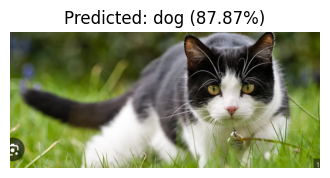

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model("/content/cifar10_ann_model.h5")

# Define CIFAR-10 class labels
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def predict_image(image_path, model):
    """Loads an image, preprocesses it, and predicts its class."""
    # Load and preprocess the image
    img = load_img(image_path, target_size=(32, 32))  # Resize to 32x32
    img = img_to_array(img)  # Convert to numpy array
    img = img / 255.0  # Normalize pixel values
    img = img.reshape(1, 32 * 32 * 3)  # Reshape to match the model's input shape

    # Predict class probabilities
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions) * 100

    return class_labels[predicted_class], confidence

def display_prediction(image_path, model):
    """Displays the image along with its predicted label."""
    predicted_label, confidence = predict_image(image_path, model)

    # Load image using OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

    # Show image and prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

# Example Usage
image_path = "/content/Screenshot 2025-03-16 171644.png"  # Replace with actual image path
display_prediction(image_path, model)
